In [390]:
import pandas as pd # For data manipulation
import sqlite3     # For database operations
import matplotlib.pyplot as plt # For data visualization

 # Read a file
df=pd.read_csv('/content/company_employee_details.csv')
df.head()

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,0,Glasses,BigData,16,41,38,3,68074.97135,17664.10410,3,0.000000,0.000000,1.000000
1,1,Glasses,AI,56,44,42,2,49092.14746,21551.14108,2,0.000000,0.184991,1.000000
2,2,Cheerper,Support,59,41,40,1,40000.00000,23698.87885,2,0.000000,0.919887,0.662706
3,3,Glasses,Design,40,39,32,7,108192.46550,21570.92966,1,0.930396,0.546206,0.000000
4,4,Glasses,Search Engine,47,30,22,9,71291.19113,21565.50572,2,0.525432,0.938412,0.000000


In [391]:
# Connect to SQLite (creates a database file)
conn=sqlite3.connect("company.db")
cursor=conn.cursor()

# Create a Company details table
cursor.execute('''
CREATE TABLE IF NOT EXISTS company_details(
id INTEGER PRIMARY KEY AUTOINCREMENT,
company_name TEXT,
department TEXT,
salary INTEGER,
anual_bonus INTEGER,
employee_id INTEGER
)
 ''')

# Insert Company data into the table
df.to_sql('company_details', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

In [392]:
#Total number of workers per company
employee_quantity=df.groupby('company')['employee_id'].count().reset_index() #.reset_index() to get clear output with title.
print(employee_quantity)


    company  employee_id
0  Cheerper         1440
1   Glasses         2369
2      Pear         1191


In [393]:
#Overall salary per company
df['salary']=df['salary'].astype(int) # change datatype into INTEGER format
company_wise_salary=df.groupby('company')['salary'].sum().reset_index()
print(company_wise_salary)

    company     salary
0  Cheerper  108729956
1   Glasses  207941156
2      Pear  119175444


In [394]:
#Overall anual bonus per company
df['annual_bonus']=df['annual_bonus'].astype(int) # change datatype into INTEGER format
company_wise_bonus=df.groupby('company')['annual_bonus'].sum().reset_index()#sum() is caculate the sum of anual bonus
print(company_wise_bonus)

    company  annual_bonus
0  Cheerper      25556981
1   Glasses      44237139
2      Pear      23216527


In [395]:
#Highest salary department in Glasses company
df['salary']=df['salary'].astype(int)
df_company=df[df['company']== 'Glasses'] # Select specfic company name
df_max=df_company.sort_values(by='salary',ascending=False) # df.sort_values() function sort the salary in DESC order.
heighst_salary=df_max.groupby('department')['salary'].sum().reset_index()
maximum=heighst_salary.max() #Get a maximum salary department
print(maximum)


department     Support
salary        90513729
dtype: object


In [396]:
#Lowest workers count per company
employee_quantity=df.groupby('company')['employee_id'].count().reset_index()
minium_employee=employee_quantity.min() # Get a lowest employee count per company
print(minium_employee)


company        Cheerper
employee_id        1191
dtype: object


In [397]:
#Calculate employee count for selective department
employye_count=df[df["department"].isin(["BigData", "Design"])] #applying filter to get specific dept
count_emp=employye_count.groupby('department')['employee_id'].count().reset_index()
print(count_emp)


  department  employee_id
0    BigData          797
1     Design          720


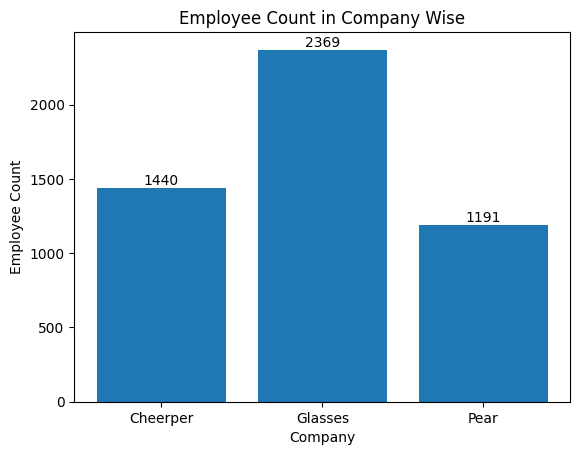

In [398]:
# Show the data lable of category values
for i in range(len(employee_quantity['company'])):
    plt.text(i, employee_quantity['employee_id'][i], employee_quantity['employee_id'][i], ha='center', va='bottom')

#plot employee count in company wise
plt.bar(employee_quantity['company'], employee_quantity['employee_id'])
plt.xlabel('Company')
plt.ylabel('Employee Count')
plt.title('Employee Count in Company Wise')
plt.show()

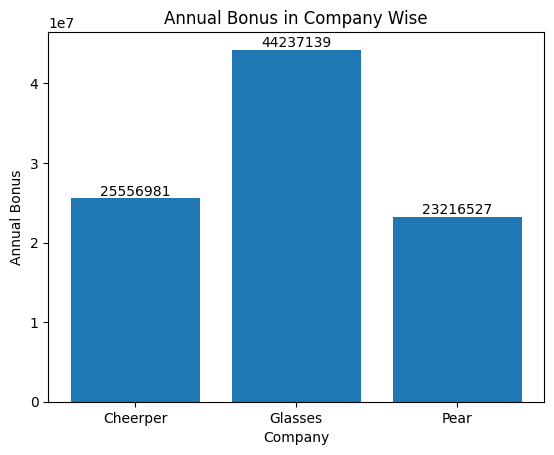

In [399]:
# Show the data lable of anual bonus

for i in range(len(company_wise_bonus['company'])):
    plt.text(i, company_wise_bonus['annual_bonus'][i], company_wise_bonus['annual_bonus'][i], ha='center', va='bottom')


#plot anual bonus in company wise
plt.bar(company_wise_bonus['company'], company_wise_bonus['annual_bonus'])
plt.xlabel('Company')
plt.ylabel('Annual Bonus')
plt.title('Annual Bonus in Company Wise')
plt.show()



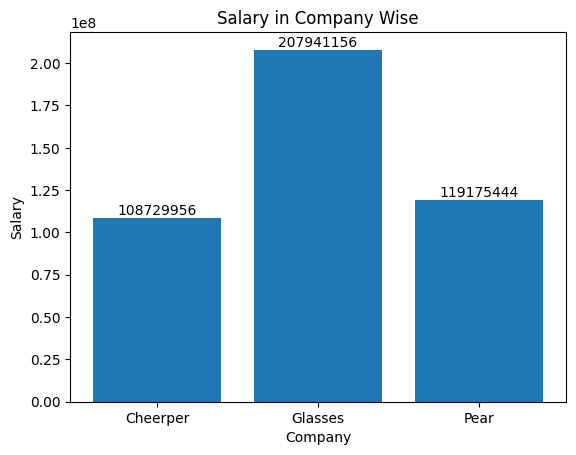

In [400]:
for i in range(len(company_wise_salary['company'])):
    plt.text(i, company_wise_salary['salary'][i], company_wise_salary['salary'][i], ha='center', va='bottom')

#plot salary in company wise
plt.bar(company_wise_salary['company'], company_wise_salary['salary'])
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Salary in Company Wise')
plt.show()
